Завантаження відкритих даних:

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU


Встановлюємо гіперпараметри:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 250  # обмеження кількості слів в тексті

Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# **RNN**

Побудова простої моделі RNN:

In [5]:
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 32))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(1, activation='sigmoid'))


Компіляція моделі:

In [6]:
model_rnn.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

Виведення опису моделі:

In [7]:
model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Навчання моделі:

In [8]:
history_rnn = model_rnn.fit(
                        input_train,
                        y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.3
                        )

Epoch 1/10
137/137 [==============================] - 14s 86ms/step - loss: 0.6106 - acc: 0.6627 - val_loss: 0.4861 - val_acc: 0.7803
Epoch 2/10
137/137 [==============================] - 11s 80ms/step - loss: 0.4103 - acc: 0.8237 - val_loss: 0.3851 - val_acc: 0.8384
Epoch 3/10
137/137 [==============================] - 11s 77ms/step - loss: 0.3062 - acc: 0.8772 - val_loss: 0.3784 - val_acc: 0.8428
Epoch 4/10
137/137 [==============================] - 10s 71ms/step - loss: 0.2279 - acc: 0.9127 - val_loss: 0.3962 - val_acc: 0.8283
Epoch 5/10
137/137 [==============================] - 10s 73ms/step - loss: 0.1643 - acc: 0.9415 - val_loss: 0.4441 - val_acc: 0.8207
Epoch 6/10
137/137 [==============================] - 11s 78ms/step - loss: 0.1101 - acc: 0.9627 - val_loss: 0.4530 - val_acc: 0.8416
Epoch 7/10
137/137 [==============================] - 11s 79ms/step - loss: 0.0692 - acc: 0.9782 - val_loss: 0.5525 - val_acc: 0.7969
Epoch 8/10
137/137 [==============================] - 11s 79ms

Відображення результатів:

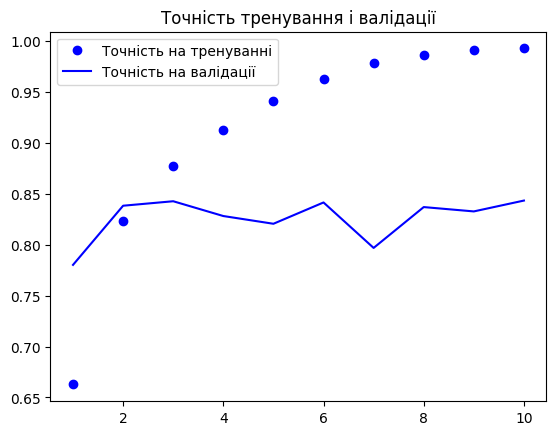

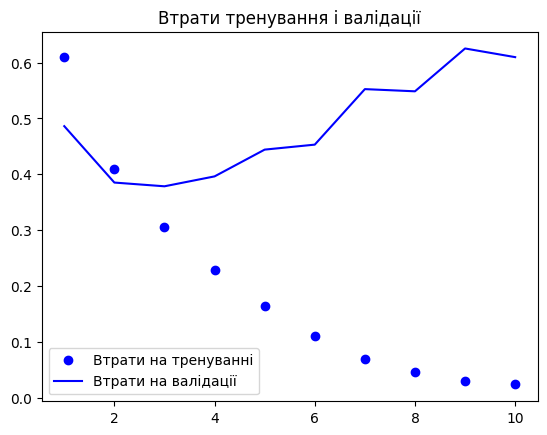

In [9]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [10]:
predictions = model_rnn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_rnn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 10s 12ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 9s 12ms/step - loss: 0.6274 - acc: 0.8340
Test Loss: 0.6274354457855225
Test Accuracy: 0.8339599967002869


### Проміжні висновки RNN:

Достатня точність моделі у 84% щодо валідаційних даних досягається після другого етапу (епохи) тренування. Після третього етапу (епохи) на валідаційних даних відбувається поступове підвищення функції похибки, що свідчить про перенавчання моделі. На тестових даних модель показує точність у 83% в той час як вивід передбачення на 10 тестових даних показав точність у 60%


# **LSTM**

Побудова моделі LSTM:



In [11]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 32))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(1, activation='sigmoid'))

Компіляція моделі:

In [12]:
model_lstm.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

Виведення опису моделі:

In [13]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



Навчання моделі:

In [14]:
history_lstm = model_lstm.fit(
                        input_train,
                        y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.3
                        )

Epoch 1/10
137/137 [==============================] - 27s 181ms/step - loss: 0.6286 - acc: 0.6326 - val_loss: 0.4380 - val_acc: 0.8101
Epoch 2/10
137/137 [==============================] - 23s 169ms/step - loss: 0.3769 - acc: 0.8471 - val_loss: 0.4983 - val_acc: 0.8129
Epoch 3/10
137/137 [==============================] - 24s 176ms/step - loss: 0.2804 - acc: 0.8902 - val_loss: 0.3193 - val_acc: 0.8713
Epoch 4/10
137/137 [==============================] - 21s 157ms/step - loss: 0.2352 - acc: 0.9107 - val_loss: 0.4098 - val_acc: 0.8404
Epoch 5/10
137/137 [==============================] - 22s 159ms/step - loss: 0.2043 - acc: 0.9240 - val_loss: 0.3234 - val_acc: 0.8773
Epoch 6/10
137/137 [==============================] - 22s 161ms/step - loss: 0.1814 - acc: 0.9339 - val_loss: 0.3196 - val_acc: 0.8816
Epoch 7/10
137/137 [==============================] - 22s 161ms/step - loss: 0.1595 - acc: 0.9442 - val_loss: 0.3143 - val_acc: 0.8769
Epoch 8/10
137/137 [==============================] - 2

Відображення результатів:

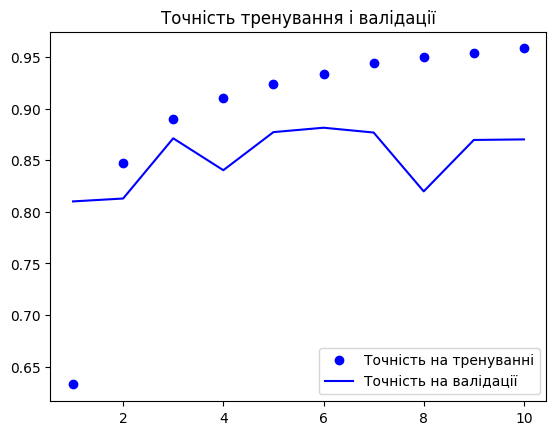

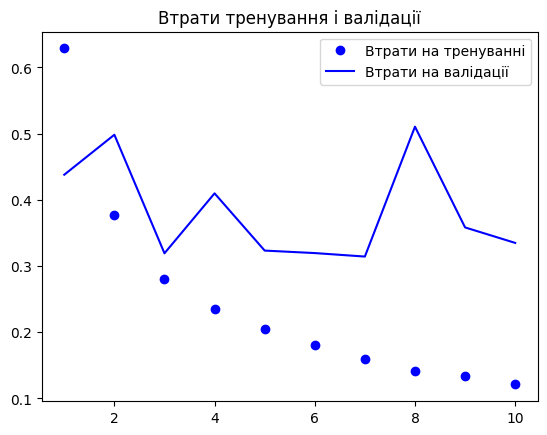

In [15]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [16]:
predictions = model_lstm.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 19s 24ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 22s 27ms/step - loss: 0.3655 - acc: 0.8602
Test Loss: 0.3655417561531067
Test Accuracy: 0.8601599931716919


### Проміжні висновки LSTM:

Найбільша точність моделі у 88% щодо валідаційних даних досягається після шостого етапу (епохи) тренування та супроводжуєтьсґ наступним зростанням функції встрат та зниженням точності моделі.  На тестових даних модель показує точність у 86% в той час як вивід передбачення на 10 тестових даних показав точність у 90%, що підтверджує загальну точність.
LSTM в порівнянні з RNN показує вищу точність на однакових даних.

# **Двостороння мережа (Bidirectional)**

Побудова моделі BDRn:

In [17]:
model_bdrn = Sequential()
model_bdrn.add(Embedding(max_features, 32))
model_bdrn.add(Bidirectional(LSTM(32)))
model_bdrn.add(Dense(1, activation='sigmoid'))

Компіляція моделі:

In [18]:
model_bdrn.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Виведення опису моделі:

In [19]:
model_bdrn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Навчання моделі:

In [20]:
history_bdrn = model_bdrn.fit(
                              input_train,
                              y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.3
                              )

Epoch 1/10
137/137 [==============================] - 43s 283ms/step - loss: 0.6592 - acc: 0.5999 - val_loss: 0.5601 - val_acc: 0.7371
Epoch 2/10
137/137 [==============================] - 38s 279ms/step - loss: 0.4218 - acc: 0.8226 - val_loss: 0.3552 - val_acc: 0.8528
Epoch 3/10
137/137 [==============================] - 38s 275ms/step - loss: 0.3077 - acc: 0.8781 - val_loss: 0.3337 - val_acc: 0.8533
Epoch 4/10
137/137 [==============================] - 38s 278ms/step - loss: 0.2537 - acc: 0.9022 - val_loss: 0.2995 - val_acc: 0.8767
Epoch 5/10
137/137 [==============================] - 38s 280ms/step - loss: 0.2164 - acc: 0.9210 - val_loss: 0.2989 - val_acc: 0.8751
Epoch 6/10
137/137 [==============================] - 38s 277ms/step - loss: 0.1898 - acc: 0.9321 - val_loss: 0.2950 - val_acc: 0.8779
Epoch 7/10
137/137 [==============================] - 38s 278ms/step - loss: 0.1694 - acc: 0.9400 - val_loss: 0.3320 - val_acc: 0.8747
Epoch 8/10
137/137 [==============================] - 3

Відображення результатів:

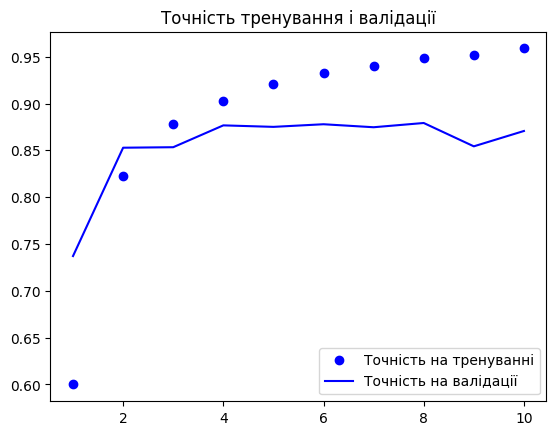

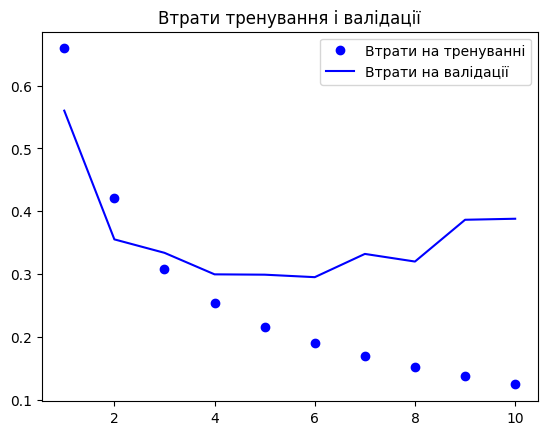

In [21]:
acc = history_bdrn.history['acc']
val_acc = history_bdrn.history['val_acc']
loss = history_bdrn.history['loss']
val_loss = history_bdrn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [22]:
predictions = model_bdrn.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_bdrn.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 29s 36ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 35ms/step - loss: 0.4182 - acc: 0.8606
Test Loss: 0.4181886613368988
Test Accuracy: 0.8606399893760681


### Проміжні висновки Bidirectional:

Найбільша точність моделі у 87,9% щодо валідаційних даних досягається після восьмого етапу (епохи) тренування, при поступовому зростанні фінкції втрат. На тестових даних модель показує точність у 86% в той час як вивід передбачення на 10 тестових даних показав точність у 80%, що підтверджує загальну точність. BDRn в порівнянні з LSTM показує однакову точність, а  в порівнянні з RNN показує вищу точність на однакових даних. Однак, слід зауважити, що при однаковому середовищі виконання (google colab) модель LSTM (264 c) навчалася швидше ніж Bidirectional (446 c) при отриманні однакової точності.


# **Глибока мережа (Deep)**

Побудова моделі Deep:

In [23]:
model_deep = Sequential()
model_deep.add(Embedding(max_features, 32))
model_deep.add(LSTM(32, return_sequences=True))
model_deep.add(LSTM(32))
model_deep.add(Dense(1, activation='sigmoid'))

Компіляція моделі:

In [24]:
model_deep.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

Виведення опису моделі:

In [25]:
model_deep.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, None, 32)          8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336673 (1.28 MB)
Trainable params: 336673 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Навчання моделі:

In [26]:
history_deep = model_deep.fit(
                              input_train,
                              y_train,
                              epochs=10,
                              batch_size=128,
                              validation_split=0.3
                              )

Epoch 1/10
137/137 [==============================] - 48s 317ms/step - loss: 0.6349 - acc: 0.6072 - val_loss: 0.4365 - val_acc: 0.8028
Epoch 2/10
137/137 [==============================] - 44s 320ms/step - loss: 0.3782 - acc: 0.8367 - val_loss: 0.3334 - val_acc: 0.8572
Epoch 3/10
137/137 [==============================] - 43s 315ms/step - loss: 0.2799 - acc: 0.8898 - val_loss: 0.3018 - val_acc: 0.8760
Epoch 4/10
137/137 [==============================] - 49s 355ms/step - loss: 0.2295 - acc: 0.9138 - val_loss: 0.3064 - val_acc: 0.8804
Epoch 5/10
137/137 [==============================] - 50s 363ms/step - loss: 0.1959 - acc: 0.9281 - val_loss: 0.3211 - val_acc: 0.8591
Epoch 6/10
137/137 [==============================] - 44s 321ms/step - loss: 0.1696 - acc: 0.9388 - val_loss: 0.3085 - val_acc: 0.8784
Epoch 7/10
137/137 [==============================] - 43s 314ms/step - loss: 0.1520 - acc: 0.9466 - val_loss: 0.6195 - val_acc: 0.8168
Epoch 8/10
137/137 [==============================] - 4

Відображення результатів:

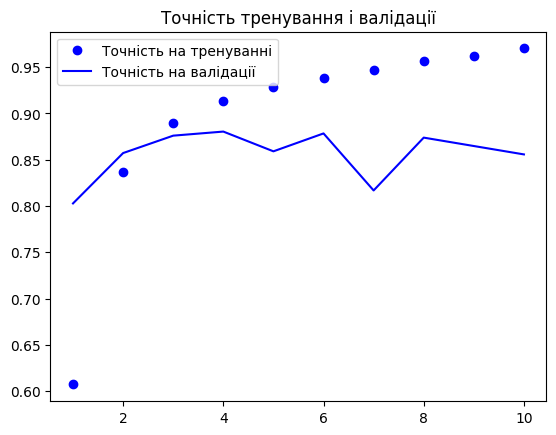

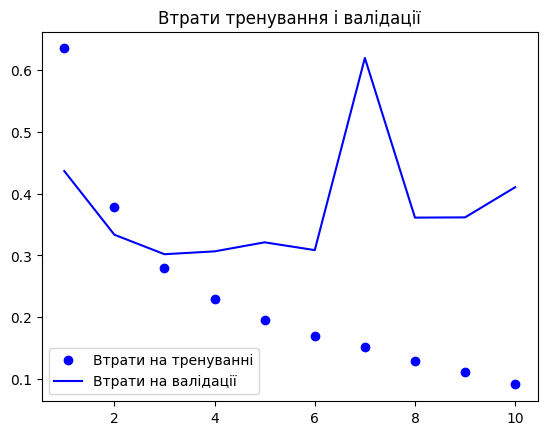

In [27]:
acc = history_deep.history['acc']
val_acc = history_deep.history['val_acc']
loss = history_deep.history['loss']
val_loss = history_deep.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [28]:
predictions = model_deep.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_deep.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 34s 43ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 34s 44ms/step - loss: 0.4337 - acc: 0.8492
Test Loss: 0.4336842894554138
Test Accuracy: 0.8491600155830383


### Проміжні висновки Deep:

Найбільша точність моделі у 87,8% щодо валідаційних даних досягається після шостого етапу (епохи) тренування. В подальшому відбувається різке погіршення функції втрат, що в свою чергу впливає на подальшу точність моделі. На тестових даних модель показує точність у 84% в той час як вивід передбачення на 10 тестових даних показав точність у 80%, що підтверджує загальну точність.
Слід зауважити, що при однаковому середовищі виконання (google colab)  та однакових гіперпараметрах, модель Deep навчалась найдовше.

# **Висновки загальні:**

Загалом усі що моделі LSTM, Bidirectional і Deep показують достатньо високі результати у класифікації рецензій. Проте, Bidirectional і особливо Deep вимагають значно більше часу для навчання при однаковому середовищі і однакових гіперпараметрах.
На мою думку, з точки зору витрати часу на навчання і отриманих результаів, найкращим вибором у аналогічній практиці, буде вибір архітектури Long Short-Term Memory (LSTM) рекурентної нейронної мережі.